Name : Rutu Ketankumar Shah
Course Title : Advanced Big Data and Data Mining 
Lab Title : Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering

Step 1 : Data Preparation and Exploration

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn import metrics

#load wine dataset
data = load_wine()
X, y = data.data, data.target
labels_true = y

#convert the dataframe for easier manipulation
df = pd.DataFrame(data=np.c_[X,y],columns=data['feature_names']+['target'])

#explore the dataset
print("Printing head()\n", df.head())
print("Printing describe()\n", df.describe())
print("Printing info()\n", df.info())

#Standarize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Printing head()
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

Step 2: Hierarchical Clustering

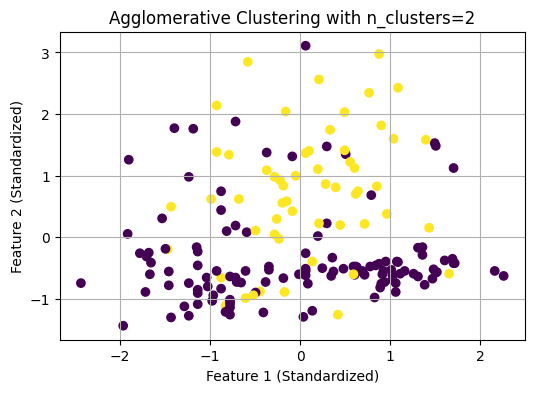

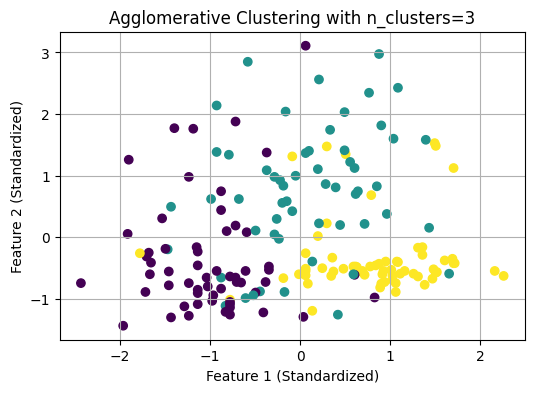

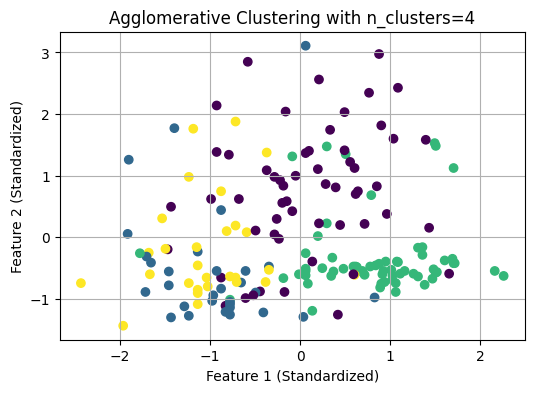

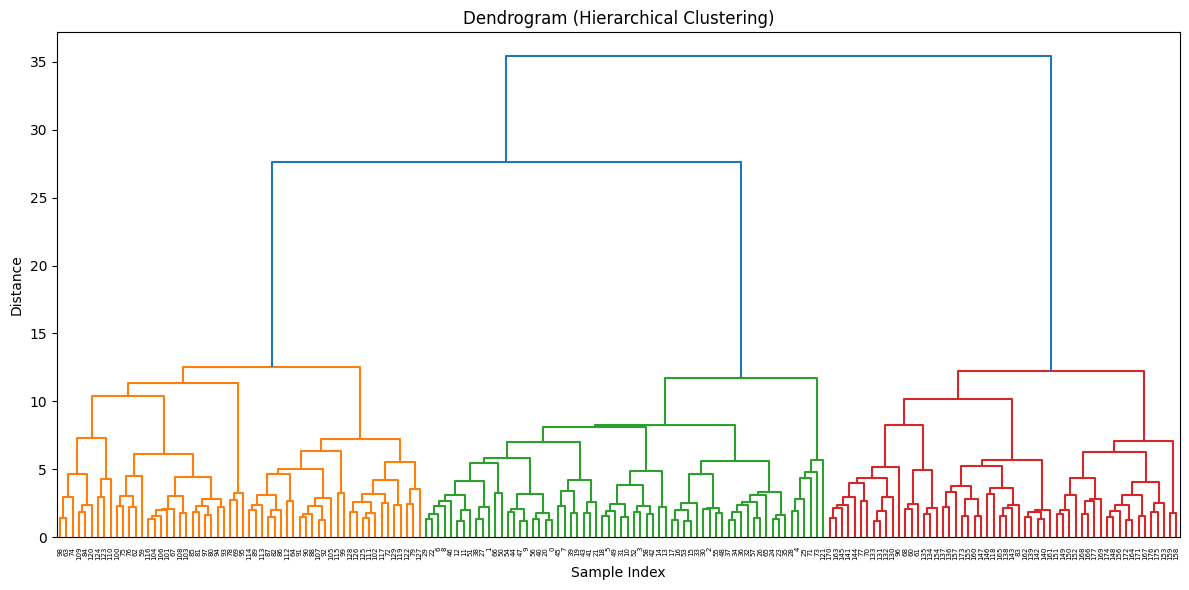

In [ ]:
# Agglomerative Clustering for n_clusters = 2, 3, 4
for n_clusters in [2, 3, 4]:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(X_scaled)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f'Agglomerative Clustering with n_clusters={n_clusters}')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.grid(True)
    plt.show()

# Generate and plot a dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Estimated number of clusters: 0
Estimated number of noise points: 178
Homogeneity Score: 0.000
Completeness Score: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Score: Cannot compute (less than 2 clusters)


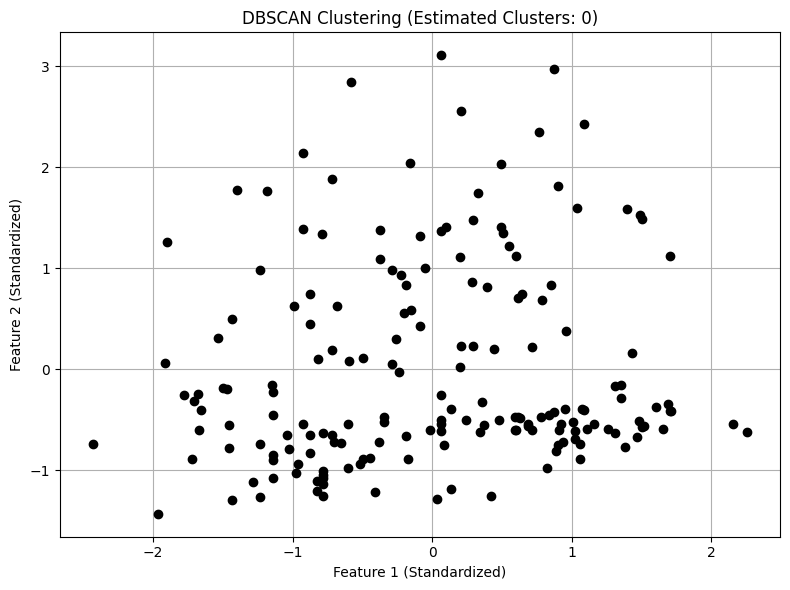

In [ ]:
# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)

# Get core samples and labels
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Print clustering metrics
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")
print(f"Homogeneity Score: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness Score: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
# Only calculate silhouette score if number of clusters >= 2
if n_clusters_ > 1:
    silhouette = metrics.silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette:.3f}")
else:
    print("Silhouette Score: Cannot compute (less than 2 clusters)")

# Plot DBSCAN clustering result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black is used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=14
    )

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=6
    )

plt.title(f'DBSCAN Clustering (Estimated Clusters: {n_clusters_})')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()
